In [15]:
import statsmodels.api as sm
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import re

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import pylab as plt
%pylab inline
import seaborn
import numpy.random as nprnd
import random
import json

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import DecisionTreeRegressor
from IPython.display import Image
import pydotplus 
import pydot
import graphviz

pd.set_option('display.max_columns', 500)
df = pd.read_csv('C:\\Users\\Siddarth Arumugam\\Documents\\GitHub\\python-introduction-SiddarthArumugam\\ClevelandHeartData.csv', index_col=0)
df.head()

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random', 'shuffle', 'plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Old peak ST,Slope,Ca,Thal,Goal,Outcome
1,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,1
3,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,0
4,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,0


In [16]:
y = df['Outcome']
X = df.drop(['Goal'], axis = 1)
X = X.drop(['Outcome'], axis  = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor(max_depth=10)
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [12]:
X.head()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Old peak ST,Slope,Ca,Thal
1,63,1,1,145,233,1,2,150,0,2.3,3,0,6
2,67,1,4,160,286,0,2,108,1,1.5,2,3,3
3,67,1,4,120,229,0,2,129,1,2.6,2,2,7
4,37,1,3,130,250,0,0,187,0,3.5,3,0,3
5,41,0,2,130,204,0,2,172,0,1.4,1,0,3


In [ ]:
def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

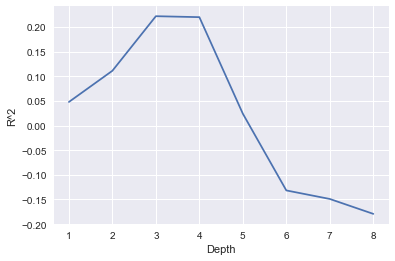

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_errors=[]
test_errors=[]
scores=[]
depths = range(1,9)
for n in depths:
    regr = DecisionTreeRegressor(max_depth=n)
    # Train the model using the training sets
    regr.fit(X_train, y_train)
    train_errors.append(regr.score(X_train,y_train))
    scores.append(regr.score(X_test,y_test))
plt.ylabel('R^2')
plt.xlabel('Depth')
plt.plot(depths,scores)
test_errors=scores
n_opt=depths[np.argmax(scores)]

In [5]:
def generate_auc(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    random_state = np.random.RandomState(0)
    # Construct training and testing set.
    #X, y = shuffle(X, y, random_state=random_state)
    n_samples, n_features = X.shape
    half = int(n_samples/1.2)
    #X_train, X_test = X[:half], X[half:]
    #y_train, y_test = y[:half], y[half:]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
    # Choose SVC classifier.
    classifier = clf_class(**kwargs)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %f" % (roc_auc))
    return fpr, tpr, roc_auc, thresholds

def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

Area under the ROC curve : 0.950758


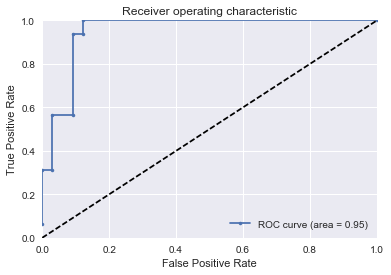

In [18]:
regr_opt = DecisionTreeRegressor(max_depth=n_opt)
regr_opt.fit(X, y)

fpr,tpr,roc_auc, thresholds = generate_auc(X_train,y_train,LogisticRegression,C=100,penalty='l1')

generate_ROCplot(fpr,tpr,'LR',roc_auc)

In [19]:
thresholds

array([ 0.99766003,  0.94880745,  0.94721481,  0.81550365,  0.65994466,
        0.44737756,  0.43998814,  0.39362639,  0.00546869])